In [140]:
import pandas as pd

In [141]:
# read from json file
df = pd.read_json('dota.json')

df.head()

,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win,winrate,lane,main_role
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",/apps/dota2/images/heroes/antimage_full.png?,/apps/dota2/images/heroes/antimage_icon.png,200,0.25,...,8610,7417,3591,1796,819,2386741,0,47.867144,1,safelane
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler]",/apps/dota2/images/heroes/axe_full.png?,/apps/dota2/images/heroes/axe_icon.png,200,2.75,...,5964,4676,2272,951,469,1927988,0,48.711569,3,offlane
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",/apps/dota2/images/heroes/bane_full.png?,/apps/dota2/images/heroes/bane_icon.png,200,NaN,...,2044,1962,1030,750,399,507261,0,52.691740,5,hard_support
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",/apps/dota2/images/heroes/bloodseeker_full.png?,/apps/dota2/images/heroes/bloodseeker_icon.png,200,NaN,...,2828,2479,1219,855,428,878740,0,49.400120,1,safelane
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",/apps/dota2/images/heroes/crystal_maiden_full....,/apps/dota2/images/heroes/crystal_maiden_icon.png,200,NaN,...,9025,7684,3865,2386,1156,2259888,0,49.860973,5,hard_support


In [142]:
features = ['base_health', 'base_health_regen', 'base_mana', 'base_mana_regen', 'base_armor', 
            'base_mr', 'base_attack_min', 'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
            'agi_gain', 'int_gain', 'attack_range', 'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate'
            ]

# fill missing values with mean
df[features] = df[features].fillna(df[features].mean())


# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print(df[features].head())



   base_health  base_health_regen  base_mana  base_mana_regen  base_armor  \
0          0.0      -1.432614e+00        0.0        -0.342659   -0.858034   
1          0.0       3.610188e+00        0.0        -0.342659   -0.858034   
2          0.0      -4.478908e-16        0.0        -0.342659    0.425008   
3          0.0      -4.478908e-16        0.0        -0.342659    1.066529   
4          0.0      -4.478908e-16        0.0         4.466593   -0.858034   

   base_mr  base_attack_min  base_attack_max  base_str  base_agi  base_int  \
0      0.0         0.286342        -0.097350  0.564793  1.273243 -1.977378   
1      0.0         0.019977        -0.343288  1.235833  0.401408 -0.456318   
2      0.0         1.085437         0.886401  0.229272  0.837326  0.557722   
3      0.0         1.085437         0.886401  0.900313  0.837326 -0.709828   
4      0.0         0.153160         0.025619 -1.112809 -0.470428 -0.963338   

   str_gain  agi_gain  int_gain  attack_range  projectile_speed  att

In [143]:
# import kmeans and vq
from scipy.cluster.vq import kmeans, vq

# kmeans
k = 6
centroids, _ = kmeans(df[features], k)

In [144]:
df['cluster_labels'], _ = vq(df[features], centroids)

# print cluster centers of each feature
print(df.groupby('cluster_labels')[features].mean())

                base_health  base_health_regen  base_mana  base_mana_regen  \
cluster_labels                                                               
0                       0.0           3.610188        0.0        -0.342659   
1                       0.0          -0.014868        0.0        -0.212679   
2                       0.0          -0.021330        0.0        -0.275864   
3                       0.0           0.008914        0.0         2.997099   
4                       0.0          -0.312461        0.0        -0.216100   
5                       0.0          -0.776886        0.0        -0.239604   

                base_armor  base_mr  base_attack_min  base_attack_max  \
cluster_labels                                                          
0                 1.066529      0.0         0.952255         0.566682   
1                 0.008886      0.0         0.624698         0.680345   
2                -0.296703      0.0        -0.412866        -0.254477   
3         

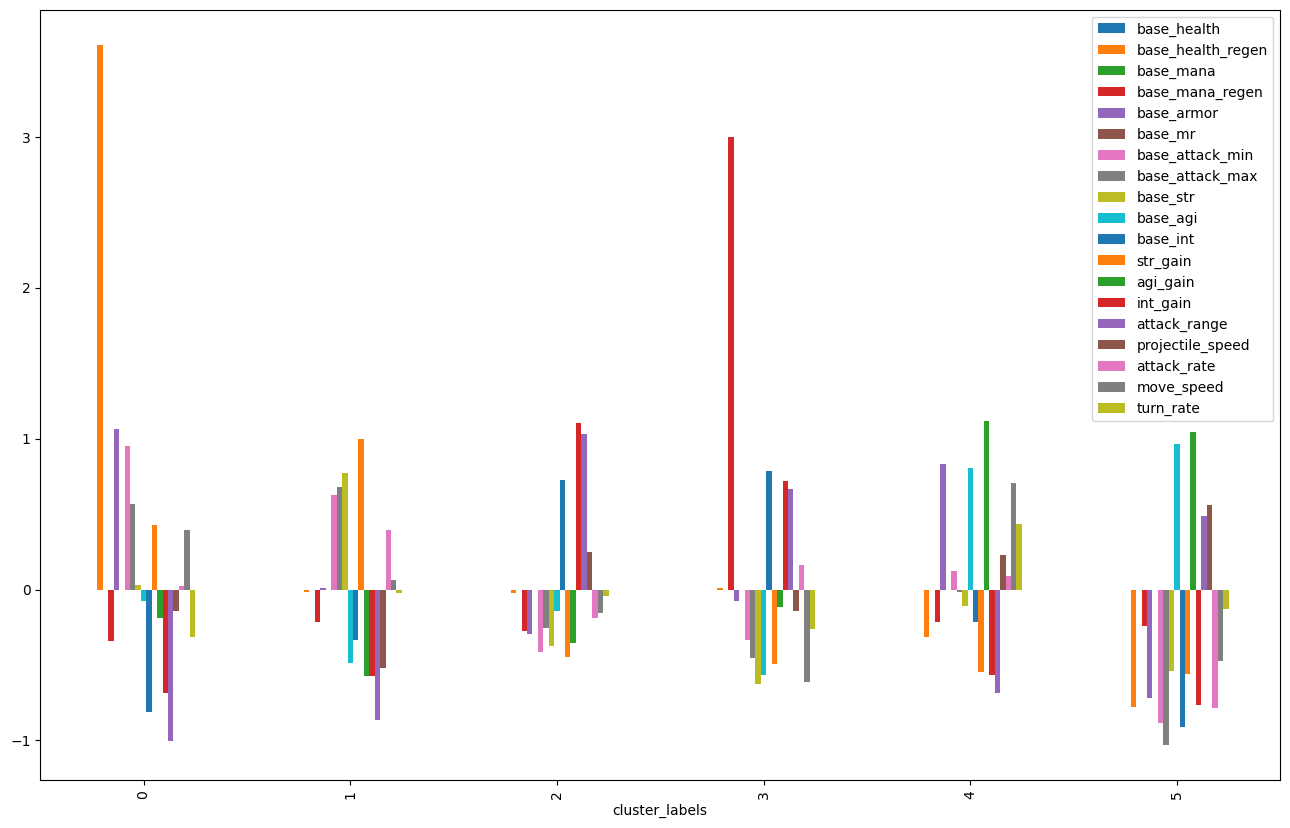

In [145]:
from matplotlib import pyplot as plt

# plot cluster centers of each feature
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar', figsize=(16, 10))
plt.show()

In [146]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['localized_name'].values)
    print('\n')
    


Cluster 5:
['Anti-Mage' 'Drow Ranger' 'Juggernaut' 'Morphling' 'Shadow Fiend' 'Razor'
 'Vengeful Spirit' 'Sniper' 'Venomancer' 'Viper' 'Clinkz' 'Huskar'
 'Lone Druid' 'Troll Warlord']


Cluster 0:
['Axe' 'Riki' 'Night Stalker' 'Ogre Magi' 'Nyx Assassin']


Cluster 4:
['Bane' 'Bloodseeker' 'Phantom Lancer' 'Faceless Void' 'Phantom Assassin'
 'Templar Assassin' 'Luna' 'Lifestealer' 'Bounty Hunter' 'Spectre' 'Ursa'
 'Gyrocopter' 'Meepo' 'Naga Siren' 'Ember Spirit' 'Terrorblade'
 'Monkey King' 'Pangolier' 'Hoodwink']


Cluster 3:
['Crystal Maiden' 'Mirana' 'Lich' 'Tinker' 'Weaver' 'Timbersaw' 'Techies'
 'Oracle' 'Void Spirit']


Cluster 1:
['Earthshaker' 'Pudge' 'Sand King' 'Sven' 'Tiny' 'Kunkka' 'Shadow Shaman'
 'Slardar' 'Tidehunter' 'Beastmaster' 'Wraith King' 'Dragon Knight'
 'Clockwerk' 'Dark Seer' 'Omniknight' 'Broodmother' 'Jakiro' 'Doom'
 'Spirit Breaker' 'Alchemist' 'Lycan' 'Brewmaster' 'Chaos Knight'
 'Treant Protector' 'Undying' 'Slark' 'Centaur Warrunner' 'Magnus'
 'Bristleback

In [147]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['primary_attr'].values)
    print('\n')



Cluster 5:
['agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'str'
 'agi' 'agi']


Cluster 0:
['str' 'agi' 'str' 'int' 'agi']


Cluster 4:
['int' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'str' 'agi' 'agi' 'agi' 'agi'
 'agi' 'agi' 'agi' 'agi' 'agi' 'agi' 'agi']


Cluster 3:
['int' 'agi' 'int' 'int' 'agi' 'str' 'int' 'int' 'int']


Cluster 1:
['str' 'str' 'str' 'str' 'str' 'str' 'int' 'str' 'str' 'str' 'str' 'str'
 'str' 'int' 'str' 'agi' 'int' 'str' 'str' 'str' 'str' 'str' 'str' 'str'
 'str' 'agi' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str' 'str'
 'str']


Cluster 2:
['int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int'
 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int' 'int'
 'int' 'int' 'int' 'str' 'int' 'agi' 'int' 'int' 'agi' 'int' 'int' 'str']




In [148]:
# get the name column of the heroes
for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['attack_type'].values)
    print('\n')

Cluster 5:
['Melee' 'Ranged' 'Melee' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged']


Cluster 0:
['Melee' 'Melee' 'Melee' 'Melee' 'Melee']


Cluster 4:
['Ranged' 'Melee' 'Melee' 'Melee' 'Melee' 'Ranged' 'Ranged' 'Melee'
 'Melee' 'Melee' 'Melee' 'Ranged' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Ranged']


Cluster 3:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Melee' 'Ranged' 'Ranged'
 'Melee']


Cluster 1:
['Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Ranged' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Ranged' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee'
 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Melee' 'Ranged'
 'Melee']


Cluster 2:
['Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged'
 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Ranged' 'Range

In [149]:

for cluster in df['cluster_labels'].unique():
    print(f'Cluster {cluster}:')
    print(df[df['cluster_labels'] == cluster]['main_role'].values)
    print('\n')

Cluster 5:
['safelane' 'safelane' 'safelane' 'safelane' 'mid' 'offlane'
 'hard_support' 'mid' 'support' 'mid' 'mid' 'mid' 'mid' 'safelane']


Cluster 0:
['offlane' 'safelane' 'offlane' 'hard_support' 'offlane']


Cluster 4:
['hard_support' 'safelane' 'safelane' 'safelane' 'safelane' 'mid'
 'safelane' 'safelane' 'offlane' 'safelane' 'safelane' 'safelane' 'mid'
 'safelane' 'mid' 'safelane' 'safelane' 'offlane' 'offlane']


Cluster 3:
['hard_support' 'support' 'hard_support' 'mid' 'safelane' 'offlane'
 'offlane' 'hard_support' 'mid']


Cluster 1:
['support' 'offlane' 'support' 'safelane' 'offlane' 'mid' 'hard_support'
 'offlane' 'offlane' 'offlane' 'safelane' 'offlane' 'offlane' 'offlane'
 'support' 'mid' 'hard_support' 'offlane' 'offlane' 'mid' 'safelane'
 'offlane' 'offlane' 'support' 'support' 'safelane' 'offlane' 'offlane'
 'offlane' 'offlane' 'support' 'offlane' 'offlane' 'offlane' 'support'
 'support' 'offlane']


Cluster 2:
['mid' 'mid' 'support' 'mid' 'support' 'hard_support' 'har

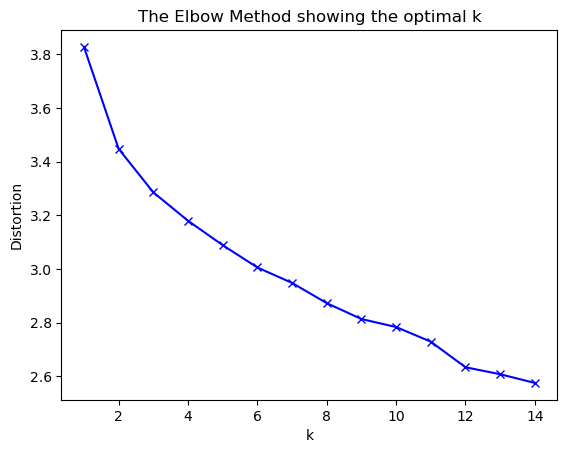

In [150]:
# perform elbow method to find optimal k
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 15)
for k in K:
    centroids, distortion = kmeans(df[features], k)
    distortions.append(distortion)

# plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
